In [1]:
import spacy
%matplotlib inline

In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
import pandas as pd
import numpy as np

In [4]:
jd = pd.read_csv('../Data/jd.csv', usecols=[0,1])

In [5]:
jd

,title,desc
0,web developer,a leading ecommerce agency is looking to hire ...
1,software engineer,"software engineer c, c++, java, uml, xamp, agi..."
2,user experience developer,user experience developer our client requires ...
3,web developer,web developer our client is looking for experi...
4,c software developers,c developer belfast salary up to ****k pa our ...
...,...,...
5431,c++ software engineer rtos,real time software engineer with c++ skills re...
5432,software engineer,software engineer this is a fantastic permanen...
5433,c software developer,we are recruiting for our client who have deve...
5434,php software developer,php software developer glasgow eden scott s cl...


In [6]:
from collections import defaultdict
utitle = defaultdict(lambda : 0)
for i in range(5436):
    utitle[jd.iloc[i,0]] += 1
len(utitle)

1149

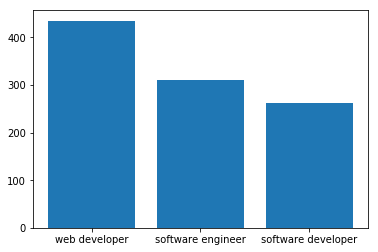

In [7]:
import operator
d = dict(sorted(utitle.items(), key=operator.itemgetter(1), reverse=True)[:3])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())

plt.show()

In [8]:
d

{'web developer': 435, 'software engineer': 310, 'software developer': 263}

In [9]:
doc = nlp(u'software-developer')
doc2 = nlp(u'web developer')

In [10]:
print(doc.similarity(doc2))
print(doc.similarity(nlp(u'systems developer')))
print(doc.similarity(nlp(u'software tester')))
print(doc.similarity(nlp(u'software engineer')))

0.6594103515593986
0.5487007476808281
0.6425009508768268
0.6070358174489049


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if

In [11]:
(jd.iloc[0,1])

'a leading ecommerce agency is looking to hire a web developer to join their team of ecommerce developers. the role will involve working on different types of client and a candidate should have the ability to create and implement unique, engaging, and intuitive work to meet client requirements. requirements: 34 years of experience in web development **** or more years on ecommerce projects in an agency setting development skills in the following technologies: o asp.net and asp o vb and vb.net o sql server / tsql o com/dcom o xml, html o javascript knowledge of microsoft commerce server, any other ecommerce solutions if this sounds like a challenge that you are ready to take up, send in your cv now'